<a href="https://colab.research.google.com/github/il1yasvie1/FEM-Isometry/blob/main/isometric-bending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2025-03-11 13:11:57--  https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4601 (4.5K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.49K  --.-KB/s    in 0s      

2025-03-11 13:11:57 (29.0 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4601/4601]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/8a21

In [ ]:
# !pip uninstall isometric_bending_solver

In [ ]:
# !pip install git+https://github.com/il1yasvie1/FEM-Isometry.git

In [ ]:
from isometric_bending_solver.problem import IsometricBendingProblem
from isometric_bending_solver.utils import plot_deformation, compute_isometry_defect, compute_surface_area, manufactured_solution
from firedrake import *
import numpy as np

q_degree = 2
dx = dx(metadata={'quadrature_degree': q_degree})
dS = dS(metadata={'quadrature_degree': q_degree})
ds = ds(metadata={'quadrature_degree': q_degree})

In [ ]:
# undeformed plate
mesh = SquareMesh(10, 10, 1)
x = SpatialCoordinate(mesh)
undeformed = {'mesh': mesh,
       'function_space': {'family': 'CG',
                          'degree': 2},
       'f': as_vector([0, 0, 0]),
       'g': as_vector([x[0], x[1], 0]),
       'phi': as_matrix([[1, 0], [0, 1], [0, 0]]),
       'sub_domain': (1, 2, 3, 4),}

In [ ]:
problem = IsometricBendingProblem(undeformed)

In [ ]:
z = problem.solve()

██╗███████╗ ██████╗ ███╗   ███╗███████╗████████╗██████╗ ██╗ ██████╗
██║██╔════╝██╔═══██╗████╗ ████║██╔════╝╚══██╔══╝██╔══██╗██║██╔════╝
██║███████╗██║   ██║██╔████╔██║█████╗     ██║   ██████╔╝██║██║ 
██║╚════██║██║   ██║██║╚██╔╝██║██╔══╝     ██║   ██╔══██╗██║██║ 
██║███████║╚██████╔╝██║ ╚═╝ ██║███████╗   ██║   ██║  ██║██║╚██████╗
╚═╝╚══════╝ ╚═════╝ ╚═╝     ╚═╝╚══════╝   ╚═╝   ╚═╝  ╚═╝╚═╝ ╚═════╝
Continuation:                  False
Family:                        CG_2
Nitsches Approach:             False
isRegularised:                 False
MeshSize:                      0.141421


In [ ]:
y = z.sub(0)
print(f'Surface Area: {compute_surface_area(y)}')
print(f'Isometry Defect: {compute_isometry_defect(y)}')

Surface Area: 1.0000000000000009
Isometry Defect: 8.940448729849582e-15


In [ ]:
mesh = SquareMesh(10, 10, 1)
x = SpatialCoordinate(mesh)
theta = np.pi/4
manufactured = {'mesh': mesh,
       'function_space': {'family': 'ARG',
                          'degree': 5},
       'nitsche': True,
       'isRegularised': {'beta': 1e-3},
       'f': as_vector([(theta**3)*sin(theta*x[0]), 0, (-1)*(theta**3)*cos(theta*x[0])]),
       'g': as_vector([sin(theta*x[0])/theta, x[1], 1 - cos(theta*x[0])/theta]),
       'phi': as_matrix([[cos(theta*x[0]), 0], [0, 1], [sin(theta*x[0]), 0]]),
       'sub_domain': (1, 2, 3, 4),
       'solver_parameters': {'snes_monitor': None, 'snes_rtol':1e-6, 'snes_atol': 1e-8},
        }

In [ ]:
problem = IsometricBendingProblem(manufactured)

In [ ]:
z = problem.solve()

██╗███████╗ ██████╗ ███╗   ███╗███████╗████████╗██████╗ ██╗ ██████╗
██║██╔════╝██╔═══██╗████╗ ████║██╔════╝╚══██╔══╝██╔══██╗██║██╔════╝
██║███████╗██║   ██║██╔████╔██║█████╗     ██║   ██████╔╝██║██║ 
██║╚════██║██║   ██║██║╚██╔╝██║██╔══╝     ██║   ██╔══██╗██║██║ 
██║███████║╚██████╔╝██║ ╚═╝ ██║███████╗   ██║   ██║  ██║██║╚██████╗
╚═╝╚══════╝ ╚═════╝ ╚═╝     ╚═╝╚══════╝   ╚═╝   ╚═╝  ╚═╝╚═╝ ╚═════╝
Continuation:                  False
Family:                        ARG_5
Nitsches Approach:             True
isRegularised:                 {'beta': 0.001}
MeshSize:                      0.141421
  0 SNES Function norm 1.840538839355e+04
  1 SNES Function norm 1.188895186797e+00
  2 SNES Function norm 1.410693936339e-01
  3 SNES Function norm 1.517252808455e-03


In [ ]:
y = z.sub(0)
print(f'Surface Area: {compute_surface_area(y)}')
print(f'Isometry Defect: {compute_isometry_defect(y)}')
print(f'L2 Error: {norm(y - problem.g_expr)}')

Surface Area: 0.9999840372773526
Isometry Defect: 0.0015056077749262624
L2 Error: 9.635757074891543e-05


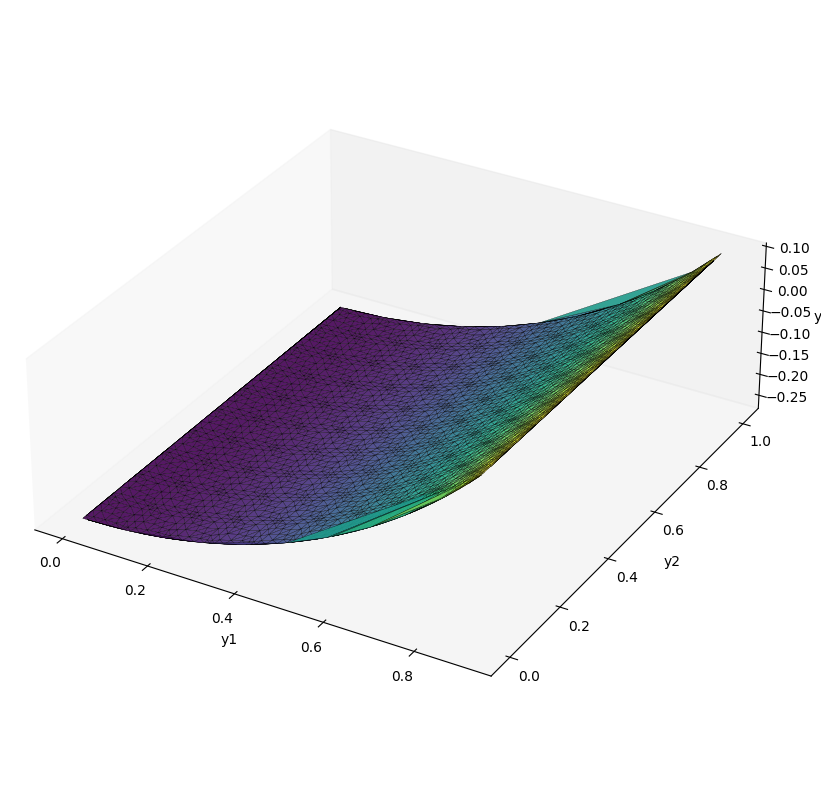

In [ ]:
plot_deformation(Function(problem.V_cg).project(y), equal_aspect=True)